<a href="https://colab.research.google.com/github/snpushpi/Covid19_Contact_tracing_repo_beta/blob/master/Final_data_analysis_overlapped_graphs_UCI_MS_big.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
main_list_uci1 = {(2.5, 1): (70, 0),
  (3, 1): (52, 1),
  (3.5, 1): (44, 2),
  (4, 1): (44, 0),
  (4.5, 1): (36, 1),
  (5, 1): (23, 1),
  (5.5, 1): (22, 4),
  (6, 1): (21, 0),
  (6.5, 1): (10, 1),
  (7, 1): (13, 0)}
main_list_uci2 ={(1.25, 2): (129, 0),
  (1.5, 2): (89, 1),
  (1.75, 2): (95, 0),
  (2.0, 2): (96, 0),
  (2.25, 2): (85, 0),
  (2.5, 2): (71, 1),
  (2.75, 2): (68, 0),
  (3.0, 2): (60, 0),
  (3.25, 2): (64, 0),
  (3.5, 2): (59, 1)}
main_list_uci5 = {(0.5, 5): (207, 0),
  (0.6, 5): (208, 1),
  (0.7, 5): (182, 0),
  (0.8, 5): (182, 1),
  (0.9, 5): (158, 0),
  (1.0, 5): (150, 0),
  (1.1, 5): (159, 1),
  (1.2, 5): (153, 0),
  (1.3, 5): (144, 0),
  (1.4, 5): (148, 1)}
main_list_uci10 = {(0.25, 10): (240, 0),
  (0.3, 10): (220, 0),
  (0.35, 10): (242, 0),
  (0.4, 10): (231, 0),
  (0.45, 10): (226, 0),
  (0.5, 10): (223, 0),
  (0.55, 10): (218, 0),
  (0.6, 10): (209, 0),
  (0.65, 10): (184, 0),
  (0.7, 10): (197, 0)}
main_list_ms1 =  {(2.5, 1): (13, 13),
  (3, 1): (13, 11),
  (3.5, 1): (12, 14),
  (4, 1): (10, 13),
  (4.5, 1): (11, 6),
  (5, 1): (8, 7),
  (5.5, 1): (3, 2),
  (6, 1): (5, 9),
  (6.5, 1): (4, 5),
  (7, 1): (5, 6)}
main_list_ms5 = {(0.5, 5): (30, 28),
  (0.6, 5): (23, 27),
  (0.7, 5): (29, 27),
  (0.8, 5): (27, 26),
  (0.9, 5): (29, 23),
  (1.0, 5): (27, 27),
  (1.1, 5): (24, 22),
  (1.2, 5): (30, 27),
  (1.3, 5): (28, 22),
  (1.4, 5): (25, 27)}
main_list_ms10 = {(0.25, 10): (40, 32), (0.3, 10): (33, 30), (0.35, 10): (26, 28), (0.4, 10): (30, 29), (0.45, 10): (38, 28), (0.5, 10): (33, 31), (0.55, 10): (34, 27), (0.6, 10): (31, 29), (0.65, 10): (31, 29), (0.7, 10): (27, 29)}
main_list_ms1_same = {(2.5, 1): (13, 221),
  (3, 1): (11, 186),
  (3.5, 1): (18, 164),
  (4, 1): (15, 163),
  (4.5, 1): (11, 125),
  (5, 1): (10, 147),
  (5.5, 1): (10, 115),
  (6, 1): (9, 115),
  (6.5, 1): (13, 89),
  (7, 1): (2, 62)}
main_list_ms5_same = {(0.5, 5): (19, 310),
  (0.6, 5): (22, 254),
  (0.7, 5): (16, 249),
  (0.8, 5): (13, 248),
  (0.9, 5): (18, 234),
  (1.0, 5): (17, 248),
  (1.1, 5): (16, 250),
  (1.2, 5): (17, 224),
  (1.3, 5): (18, 218),
  (1.4, 5): (10, 208)}
main_list_ms10_same = {(0.25, 10): (24, 288), (0.3, 10): (16, 275), (0.35, 10): (17, 308), (0.4, 10): (23, 269), (0.45, 10): (23, 287), (0.5, 10): (25, 257), (0.55, 10): (12, 287), (0.6, 10): (19, 231), (0.65, 10): (22, 233), (0.7, 10): (23, 230)}

In [86]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('ggplot')
%matplotlib inline
import math

In [87]:
epsilon_list = [2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]
epsilon_list5 = []
epsilon_list10 = []
epsilon_list2 = []
for eps in epsilon_list:
    epsilon_list5.append(eps/5)
    epsilon_list10.append(eps/10)
    epsilon_list2.append(eps/2)

In [88]:
def TPR(tp, fn):
    frac = tp/(tp+fn)
    return 100*frac

In [89]:
def FPR(fp, tn):
    frac = fp/(fp+tn)
    return 100*frac

In [90]:
def MCC(tp, tn, fp, fn):
    num = tp*tn - fp*fn
    denom = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return (num)/denom

In [91]:
def f1(tp,fp,fn):
    return tp/(tp+0.5*(fp+fn))

TP,  FP,  TN,  FN

In [92]:
def uci_ratio_gen(tp,fp):
    fn = 336-tp
    tn = 1123-336-fp
    return (tp,tn,fp,fn)
def ms_ratio_gen(tp,fp):
    fn = 43-tp 
    tn = 720-43-fp
    return (tp,tn,fp,fn)

Microsoft Dataset (The Bigger Version)

In [93]:
tp_fp_ms_list1 =[]
tp_fp_ms_list5 = []
tp_fp_ms_list10 = []
tp_fp_ms_list1_same = []
tp_fp_ms_list5_same = []
tp_fp_ms_list10_same = []
for eps in epsilon_list:
    tp_fp_ms_list1.append(main_list_ms1[(eps,1)])
    tp_fp_ms_list5.append(main_list_ms5[(eps/5,5)])
    tp_fp_ms_list10.append(main_list_ms10[(eps/10,10)])
    tp_fp_ms_list1_same.append(main_list_ms1_same[(eps,1)])
    tp_fp_ms_list5_same.append(main_list_ms5_same[(eps/5,5)])
    tp_fp_ms_list10_same.append(main_list_ms10_same[(eps/10,10)])

In [94]:
def list_gen(tuple_list):
    result_list = []
    for elt in tuple_list:
        result_list.append(ms_ratio_gen(elt[0],elt[1]))
    return result_list
def list_gen_uci(tuple_list):
    result = []
    for elt in tuple_list:
        result.append(uci_ratio_gen(elt[0],elt[1]))
    return result 
def mcc_gen(tuple_list):
    result = []
    for elt in tuple_list:
        result.append(MCC(elt[0],elt[1],elt[2],elt[3]))
    return result 
def f1_gen(tuple_list):
    result = []
    for elt in tuple_list:
        result.append(f1(elt[0],elt[2],elt[3]))
    return result 

In [95]:
mcc = {'same':{1:{},5:{},10:{}},'different':{1:{},5:{},10:{}}}
tp_fp_ms_list1_m = mcc_gen(list_gen(tp_fp_ms_list1))
tp_fp_ms_list5_m = mcc_gen(list_gen(tp_fp_ms_list5))
tp_fp_ms_list10_m = mcc_gen(list_gen(tp_fp_ms_list10))
tp_fp_ms_list1_same_m = mcc_gen(list_gen(tp_fp_ms_list1_same))
tp_fp_ms_list5_same_m = mcc_gen(list_gen(tp_fp_ms_list5_same))
tp_fp_ms_list10_same_m = mcc_gen(list_gen(tp_fp_ms_list10_same))

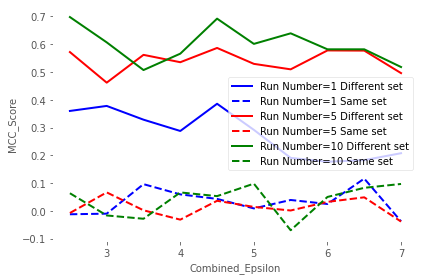

In [102]:
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.clf()
plt.xlabel('Combined_Epsilon')
plt.ylabel('MCC_Score')
plt.plot(epsilon_list, tp_fp_ms_list1_m,'b-', label = 'Run Number=1 Different set')
plt.plot(epsilon_list, tp_fp_ms_list1_same_m,'b--', label = 'Run Number=1 Same set')
plt.plot(epsilon_list, tp_fp_ms_list5_m,'r-', label = 'Run Number=5 Different set')
plt.plot(epsilon_list, tp_fp_ms_list5_same_m,'r--', label = 'Run Number=5 Same set')
plt.plot(epsilon_list, tp_fp_ms_list10_m,'g-', label = 'Run Number=10 Different set')
plt.plot(epsilon_list, tp_fp_ms_list10_same_m,'g--', label = 'Run Number=10 Same set')
plt.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=10
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
plt.tight_layout()
plt.legend()

In [103]:

tp_fp_ms_list1_f = f1_gen(list_gen(tp_fp_ms_list1))
tp_fp_ms_list5_f = f1_gen(list_gen(tp_fp_ms_list5))
tp_fp_ms_list10_f = f1_gen(list_gen(tp_fp_ms_list10))
tp_fp_ms_list1_same_f = f1_gen(list_gen(tp_fp_ms_list1_same))
tp_fp_ms_list5_same_f = f1_gen(list_gen(tp_fp_ms_list5_same))
tp_fp_ms_list10_same_f = f1_gen(list_gen(tp_fp_ms_list10_same))


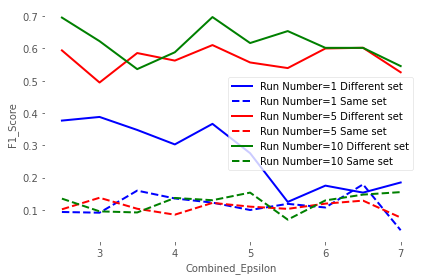

In [106]:

epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.clf()
plt.xlabel('Combined_Epsilon')
plt.ylabel('F1_Score')
plt.plot(epsilon_list, tp_fp_ms_list1_f,'b-', label = 'Run Number=1 Different set')
plt.plot(epsilon_list, tp_fp_ms_list1_same_f,'b--', label = 'Run Number=1 Same set')
plt.plot(epsilon_list, tp_fp_ms_list5_f,'r-', label = 'Run Number=5 Different set')
plt.plot(epsilon_list, tp_fp_ms_list5_same_f,'r--', label = 'Run Number=5 Same set')
plt.plot(epsilon_list, tp_fp_ms_list10_f,'g-', label = 'Run Number=10 Different set')
plt.plot(epsilon_list, tp_fp_ms_list10_same_f,'g--', label = 'Run Number=10 Same set')
mpl.rcParams['boxplot.showbox'] = True
plt.tight_layout()
plt.legend()

In [78]:
tp_fp_uci_list1 =[]
tp_fp_uci_list5 = []
tp_fp_uci_list2 = []
tp_fp_uci_list10 = []
for eps in epsilon_list:
    tp_fp_uci_list1.append(main_list_uci1[(eps,1)])
    tp_fp_uci_list5.append(main_list_uci5[(eps/5,5)])
    tp_fp_uci_list10.append(main_list_uci10[(eps/10,10)])
    tp_fp_uci_list2.append(main_list_uci2[(eps/2,2)])
    

In [79]:

tp_fp_uci_list1_m = mcc_gen(list_gen_uci(tp_fp_uci_list1))
tp_fp_uci_list5_m = mcc_gen(list_gen_uci(tp_fp_uci_list5))
tp_fp_uci_list10_m = mcc_gen(list_gen_uci(tp_fp_uci_list10))
tp_fp_uci_list2_m = mcc_gen(list_gen_uci(tp_fp_uci_list2))

Text(0.5, 1.0, 'UCI Trajectory Dataset')

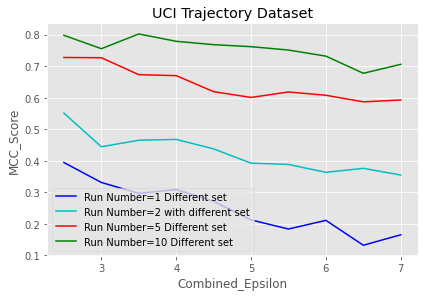

In [81]:
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.clf()
plt.xlabel('Combined_Epsilon')
plt.ylabel('MCC_Score')
plt.plot(epsilon_list, tp_fp_uci_list1_m,'b-', label = 'Run Number=1 Different set')
plt.plot(epsilon_list, tp_fp_uci_list2_m,'c-', label = "Run Number=2 with different set" )
plt.plot(epsilon_list, tp_fp_uci_list5_m,'r-', label = 'Run Number=5 Different set')

plt.plot(epsilon_list, tp_fp_uci_list10_m,'g-', label = 'Run Number=10 Different set')
plt.tight_layout()
plt.legend()
plt.title("UCI Trajectory Dataset")

In [83]:

tp_fp_uci_list1_f = f1_gen(list_gen_uci(tp_fp_uci_list1))
tp_fp_uci_list5_f = f1_gen(list_gen_uci(tp_fp_uci_list5))
tp_fp_uci_list10_f = f1_gen(list_gen_uci(tp_fp_uci_list10))
tp_fp_uci_list2_f = f1_gen(list_gen_uci(tp_fp_uci_list2))

Text(0.5, 1.0, 'UCI Trajectory Dataset')

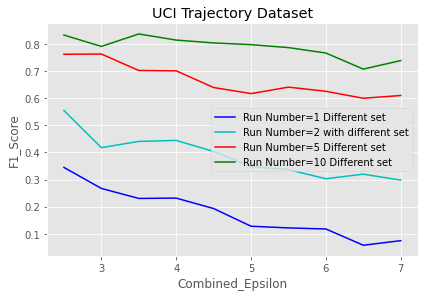

In [84]:
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.clf()
plt.xlabel('Combined_Epsilon')
plt.ylabel('F1_Score')
plt.plot(epsilon_list, tp_fp_uci_list1_f,'b-', label = 'Run Number=1 Different set')
plt.plot(epsilon_list, tp_fp_uci_list2_f,'c-', label = "Run Number=2 with different set" )
plt.plot(epsilon_list, tp_fp_uci_list5_f,'r-', label = 'Run Number=5 Different set')

plt.plot(epsilon_list, tp_fp_uci_list10_f,'g-', label = 'Run Number=10 Different set')
plt.tight_layout()
plt.legend()
plt.title("UCI Trajectory Dataset")